In [18]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'medium'
plt.rcParams['lines.linewidth'] = 2.5

In [19]:
"""
Make a function that calculate the payoff on a few parameters

S = stock underlying
K = strike price
Price = premium paid for option
"""

def long_call(S, K, Price):
    # Local call Payoff = max(Stock Price - Strike Price, 0)
    # If we are long a call, we would only elect to call if the
    # current stock price is greater than the strike price on our option
    
    return list(map(lambda x: max(x - K, 0) - Price, S))
    
def long_put(S, K, price):
    # Long Put Payoff = max(Strike Price - Stock Price, 0)
    
    return list(map(lambda x: max(K - x, 0) - price, S))

def short_call(S, K, price):
    # Payoff a shortcall is just the inverse of the payoff of a long call
    P = long_call(S, K, price)
    return [-1.0 * p for p in P]

def short_put(S, K, price):
    # Payoff a shortput is just the inverse of the payoff of a long put
    P = long_put(S, K, price)
    return [-1.0 * p for p in P]



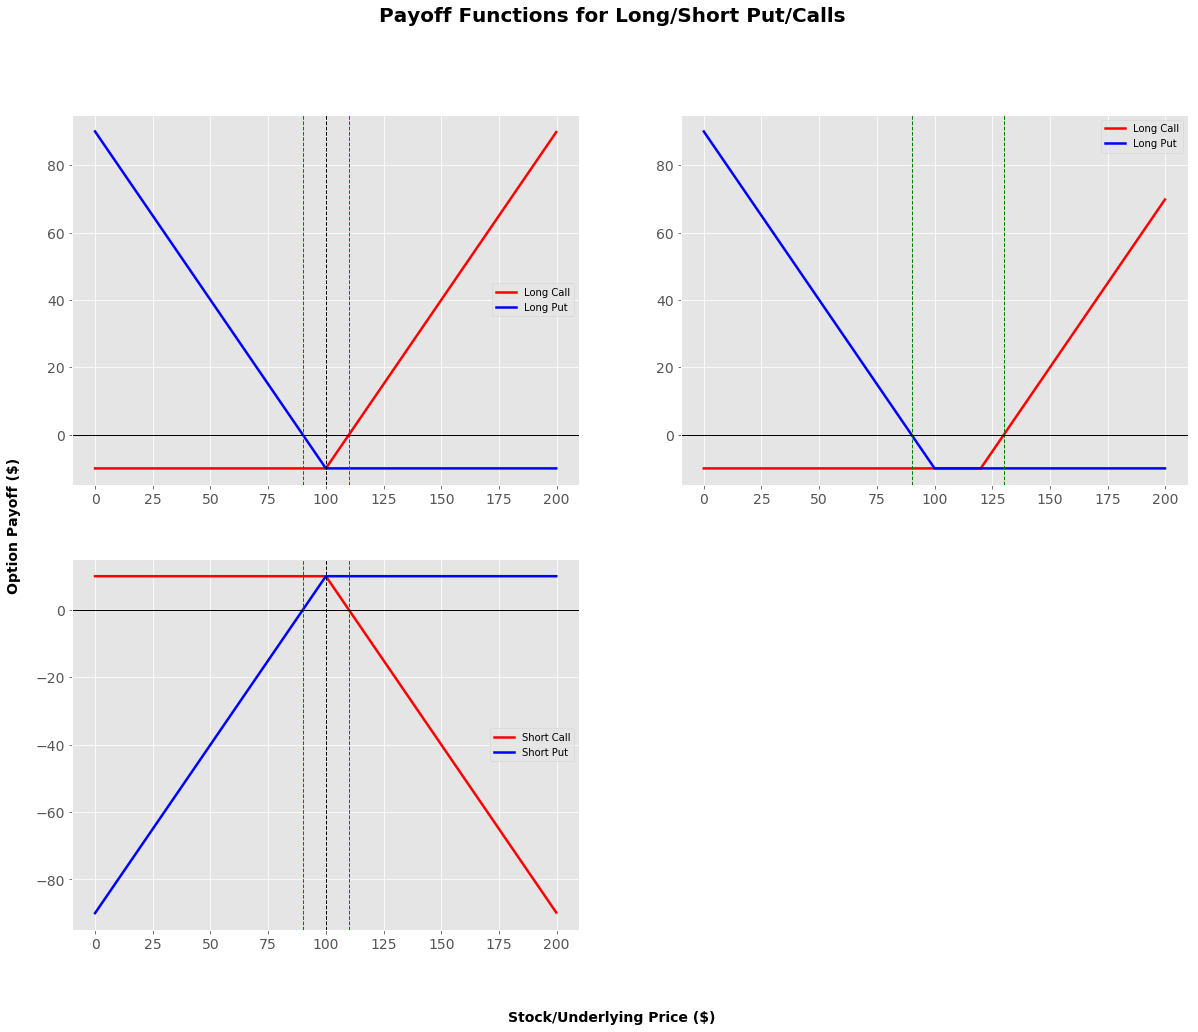

In [20]:
S = [t/5 for t in range(0, 1000)]
K = 100
price = 10

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True, figsize = (20,15))
fig.suptitle('Payoff Functions for Long/Short Put/Calls', fontsize=20, fontweight='bold')
fig.text(0.5, 0.04, 'Stock/Underlying Price ($)', ha='center', fontsize=14, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff ($)', va='center', rotation='vertical', fontsize=14, fontweight='bold')


lc_P = long_call(S, K, price)
lp_P = long_put(S, K, price)
plt.subplot(221)
plt.plot(S, lc_P, 'r')
plt.plot(S, lp_P, 'b')
plt.axvline(x=K, linestyle='--', linewidth=1, color='black' )
plt.axvline(x=K + price, linestyle='--', linewidth=1, color='g' )
plt.axvline(x=K - price, linestyle='--', linewidth=1, color='g' )
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(['Long Call', 'Long Put'])

cK = 120
pK = 100
t2 = long_call(S, cK, 10)
t4 = long_put(S, pK, 10)
plt.subplot(222)
plt.plot(S, t2, 'r')
plt.plot(S, t4, 'b')
plt.axvline(x=cK + price, linestyle='--', linewidth=1, color='g' )
plt.axvline(x=pK - price, linestyle='--', linewidth=1, color='g' )
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(['Long Call', 'Long Put'])

lc_P = short_call(S, K, price)
lp_P = short_put(S, K, price)
plt.subplot(223)
plt.plot(S, lc_P, 'r')
plt.plot(S, lp_P, 'b')
plt.axvline(x=K, linestyle='--', linewidth=1, color='black' )
plt.axvline(x=K + price, linestyle='--', linewidth=1, color='g' )
plt.axvline(x=K - price, linestyle='--', linewidth=1, color='g' )
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(['Short Call', 'Short Put'])





In [21]:
def bull_spread(S, E1, E2, Price1, Price2):
    P_1 = long_call(S, E1, Price1)
    P_2 = short_call(S, E2, Price2)
    return [x+y for x, y in zip(P_1, P_2)]

def bear_spread(S, E1, E2, Price1, Price2):
    P = bull_spread(S,E1, E2, Price1, Price2)
    return [-1.0*p + 1.0 for p in P] 


def straddle(S, E, Price1, Price2):
    P_1 = long_call(S, E, Price1)
    P_2 = long_put(S, E, Price2)
    return [x+y for x, y in zip(P_1, P_2)]


def butterfly_spread(S, E1, E2, E3, Price1, Price2, Price3):
    P_1 = long_call(S, E1, Price1)
    P_2 = long_call(S, E3, Price3)
    P_3 = short_call(S, E2, Price2)
    P_3 =[2*p for p in P_3]
    return [x + y + z for x, y, z in zip(P_1, P_2, P_3)]


def condor(S, E1, E2, E3, E4, Price1, Price2, Price3, Price4, iron=False):
    if iron:
        P_1 = long_put(S, E1, Price1)
        P_2 = short_put(S, E2, Price2)
    else:
        P_1 = long_call(S, E1, Price1)
        P_2 = short_call(S, E2, Price2)
        
    P_3 = short_call(S, E3, Price3)
    P_4 = long_call(S, E4, Price4)
    
    return [w + x + y + z for w, x, y, z in zip(P_1, P_2, P_3, P_4)]

def strangle(S, E1, E2, Price1, Price2):
    P_1 = long_call(S, E1, Price1)
    P_2 = long_put(S, E2, Price2)
    return [x+y for x, y in zip(P_1, P_2)]

Text(0.5,1,'Condor - Butterfly')

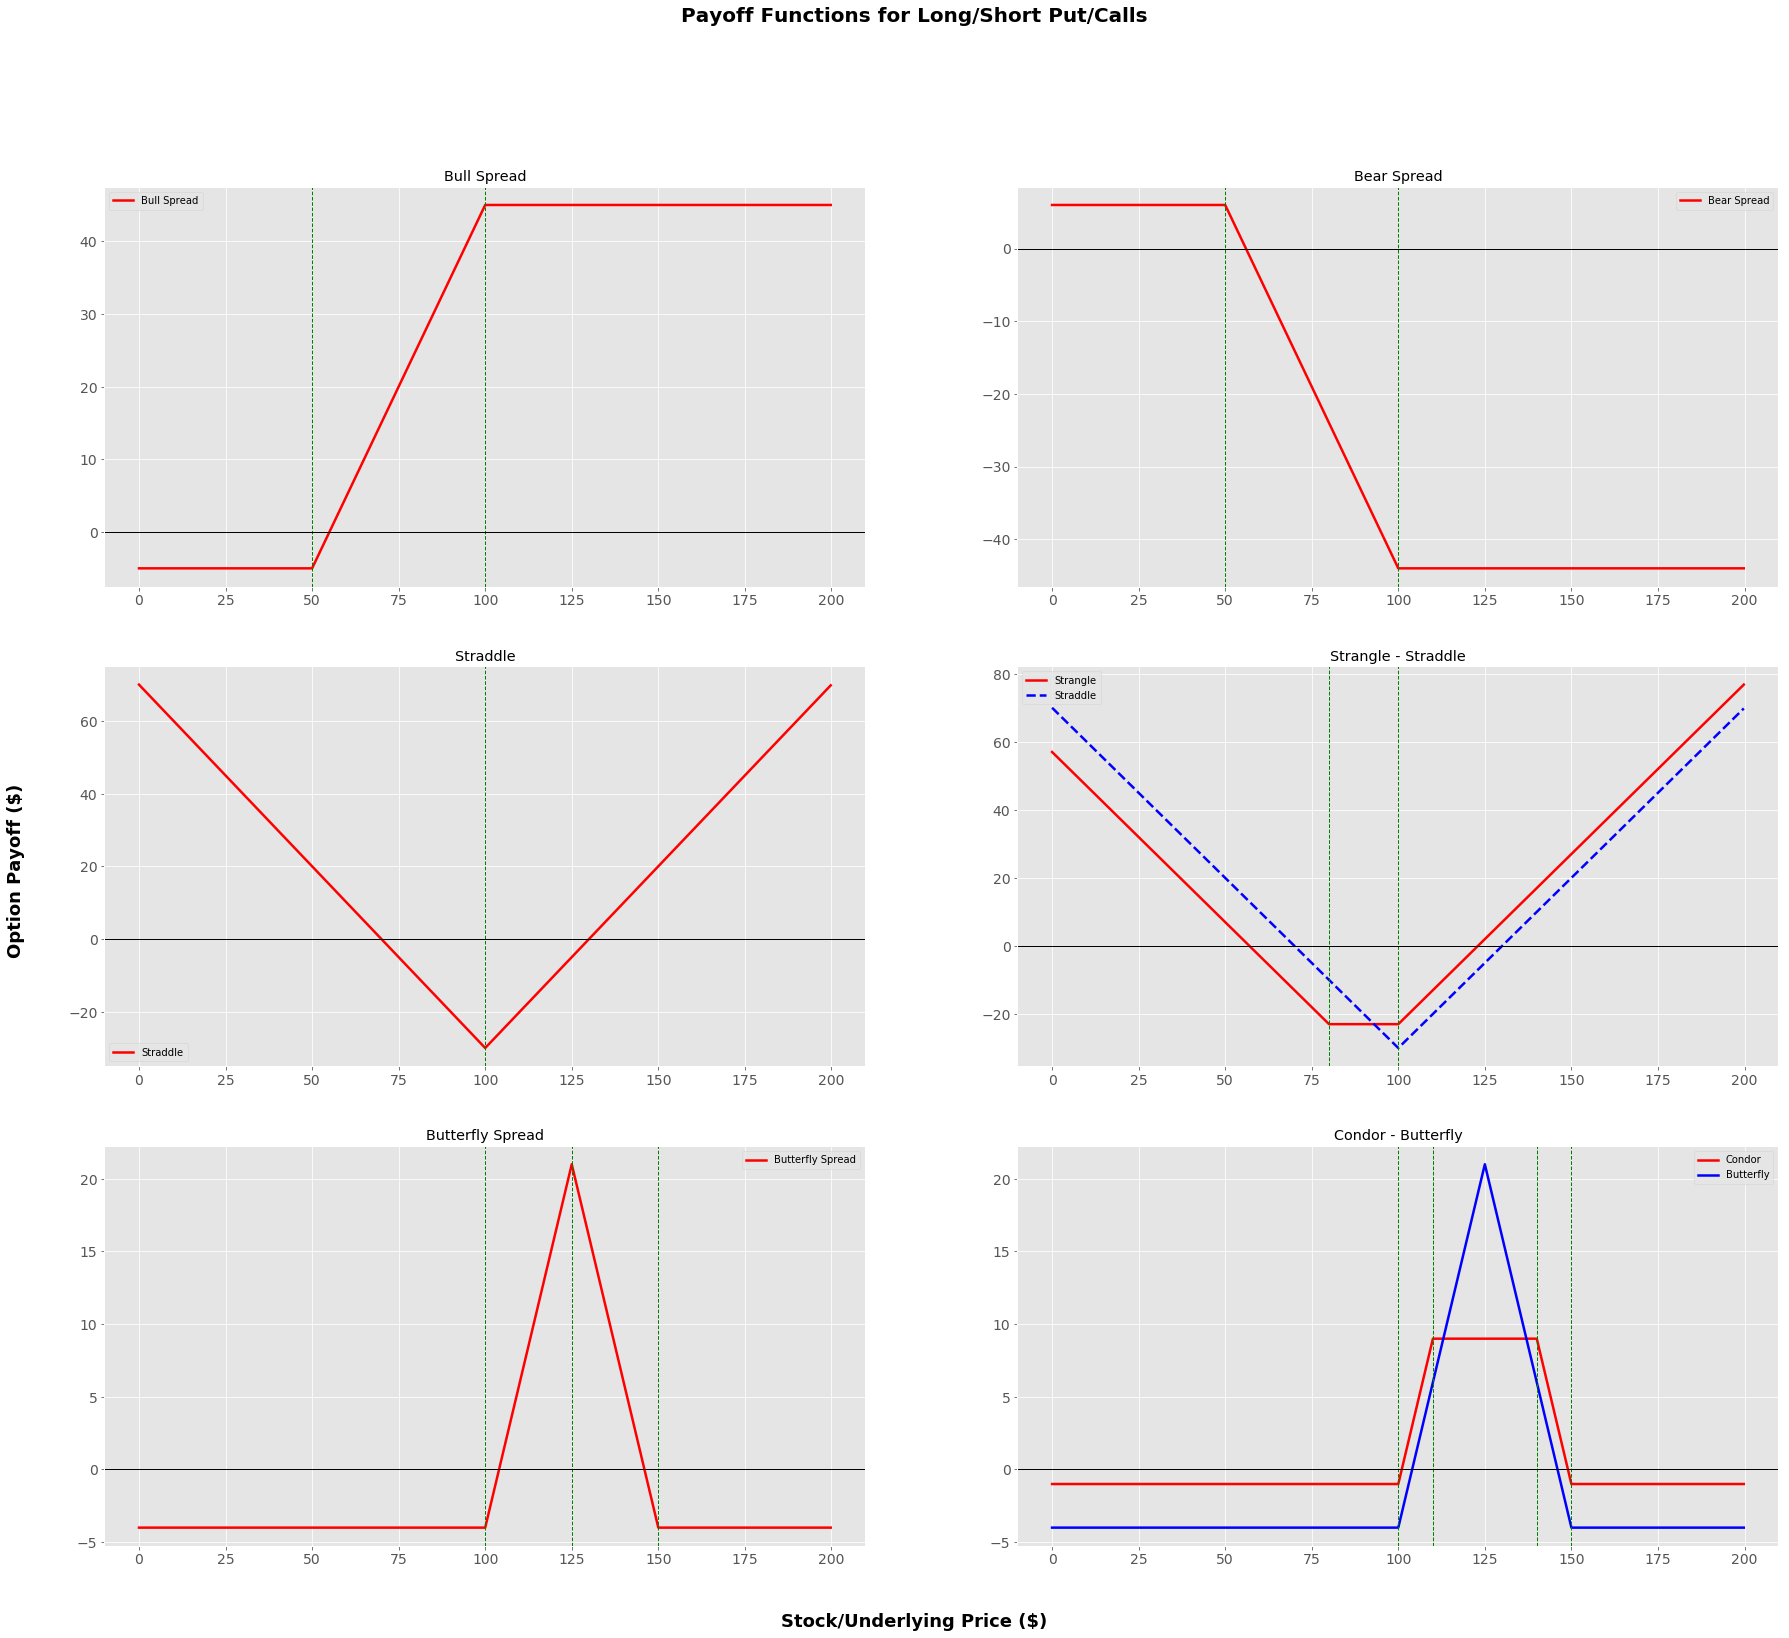

In [22]:
def plot_strikes(strikes):
    for strike in strikes:
        plt.axvline(x=strike, linestyle='--', linewidth=1, color='g' )


fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(30, 25))
fig.suptitle('Payoff Functions for Long/Short Put/Calls', fontsize=20, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff ($)', va='center', rotation='vertical', fontsize=18, fontweight='bold')

plt.subplot(321)
P1 = bull_spread(S,50, 100, 15, 10)
plt.plot(S, P1, 'r')
plt.axvline(x=50, linestyle='--', linewidth=1, color='g' )
plt.axvline(x=100, linestyle='--', linewidth=1, color='g' )
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(["Bull Spread"])
plt.title("Bull Spread")

plt.subplot(322)
P1 = bear_spread(S,50, 100, 15, 10)
plt.plot(S, P1, 'r')
plt.axvline(x=50, linestyle='--', linewidth=1, color='g' )
plt.axvline(x=100, linestyle='--', linewidth=1, color='g' )
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(["Bear Spread"])
plt.title("Bear Spread")


plt.subplot(323)
P1 = straddle(S, 100, 15, 15)
plt.plot(S, P1, 'r')
# plt.axvline(x=50, linestyle='--', linewidth=1, color='g' )
plt.axvline(x=100, linestyle='--', linewidth=1, color='g' )
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(["Straddle"])
plt.title("Straddle")

strikes = [80, 100]
plt.subplot(324)
P2 = strangle(S, strikes[1], strikes[0], 15, 8)
plt.plot(S, P2, 'r')
plt.plot(S, P1, 'b--')
plot_strikes(strikes)
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(["Strangle", "Straddle"])
plt.title("Strangle - Straddle")

plt.subplot(325)
P1 = butterfly_spread(S, 100, 125, 150, 10, 5, 4)
plt.plot(S, P1, 'r')
plt.axvline(x=100, linestyle='--', linewidth=1, color='g' )
plt.axvline(x=125, linestyle='--', linewidth=1, color='g' )
plt.axvline(x=150, linestyle='--', linewidth=1, color='g' )
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(["Butterfly Spread"])
plt.title("Butterfly Spread")

strikes = [100, 110, 140, 150]
plt.subplot(326)
P2 = condor(S, strikes[0], strikes[1], strikes[2], strikes[3], 2, 7, 6, 2, iron=True)
plt.plot(S, P2, 'r')
plt.plot(S, P1, 'b')
plot_strikes(strikes)
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(["Condor", "Butterfly"])
plt.title("Condor - Butterfly")




Text(0.5,1,'Condor')

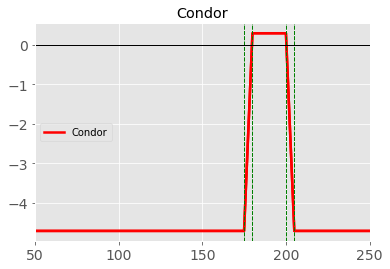

In [23]:
# Test for condor
S = [t/5 for t in range(0, 2000)]
strikes = [175, 180, 200, 205]
P2 = condor(S, strikes[0], strikes[1], strikes[2], strikes[3], 0.08, 0.27, 0.19, 0.09, iron=True)
plt.plot(S, P2, 'r')
# plt.plot(S, P1, 'b')
plot_strikes(strikes)
plt.axhline(y=0, color='black', linewidth=1)
plt.xlim(50, 250)
plt.legend(["Condor"])
plt.title("Condor")



Text(0.5,1,'Butterfly')

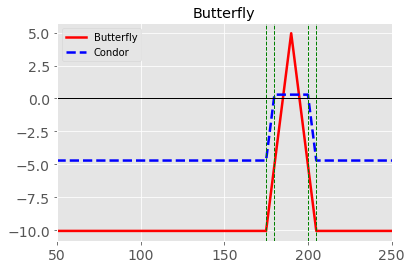

In [31]:
# Test for butterfly
S = [t/5 for t in range(0, 2000)]
# Testing with aapl option prices
strikes = [175, 190, 190, 205]
P2 = condor(S, strikes[0], strikes[1], strikes[2], strikes[3], 13.7, 1.87, 1.87, 0.09, iron=False)

strikes = [175, 180, 200, 205]
P1 = condor(S, strikes[0], strikes[1], strikes[2], strikes[3], 0.08, 0.27, 0.19, 0.09, iron=True)


plt.plot(S, P2, 'r')
plt.plot(S, P1, 'b--')
# plt.plot(S, P1, 'b')
plot_strikes(strikes)
plt.axhline(y=0, color='black', linewidth=1)
plt.xlim(50, 250)
plt.legend(["Butterfly", "Condor"])
plt.title("Butterfly")




In [8]:
# BLACK SCHOLES AND GREEKS

In [35]:
from scipy.stats import norm

# S: underlying stock price
# K: Option strike price
# r: risk free rate
# D: dividend value
# vol: Volatility
# T: time to expiry (assumed that we're measuring from t=0 to t)

def d1_calc(S, K, r, vol, T, t):
    return (np.log(S/K) + (r + 0.5 * vol**2)*(T-t)) / (vol*np.sqrt(T-t))

def BS_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)


def BS_put(S, K, r, vol, T, t):
    return BS_call(S, K, r, vol, T, t) - S + np.exp(-r*(T-t))*K



In [36]:
# Option greeks

In [37]:
# 1st order Greeks
def delta(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)
    
    if(otype == 'call'):
        delta = np.exp(-(T-t)) * norm.cdf(d1)
    elif(otype == 'put'):
        delta = -np.exp(-(T-t)) * norm.cdf(-d1)
    return delta

def vega(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    return S * norm.pdf(d1) * np.sqrt(T - t)

/Users/khandkerhasan/anaconda/envs/env-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


96.90566624593154

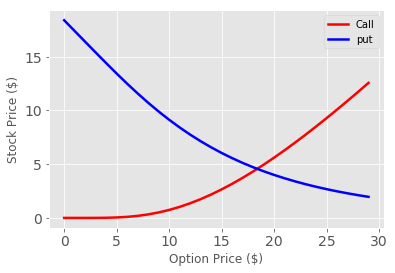

In [38]:
S = np.arange(0, 30)
vals_call = [BS_call(x, 50, 0.1, 0.2, 10, 0) for x in S]
vals_put = [BS_put(x, 50, 0.1, 0.2, 10, 0) for x in S]

plt.plot(S, vals_call, 'r', label='Call')
plt.plot(S, vals_put, 'b', label='put')

plt.legend()
plt.ylabel("Stock Price ($)")
plt.xlabel("Option Price ($)")

import datetime
V_market = 114.9
K = 160.00
T = 3
S = 181.78
r = 0.001
vol = 0.78
cp = 'call' # call option
BS_call(S, K, r, vol, T, 0)


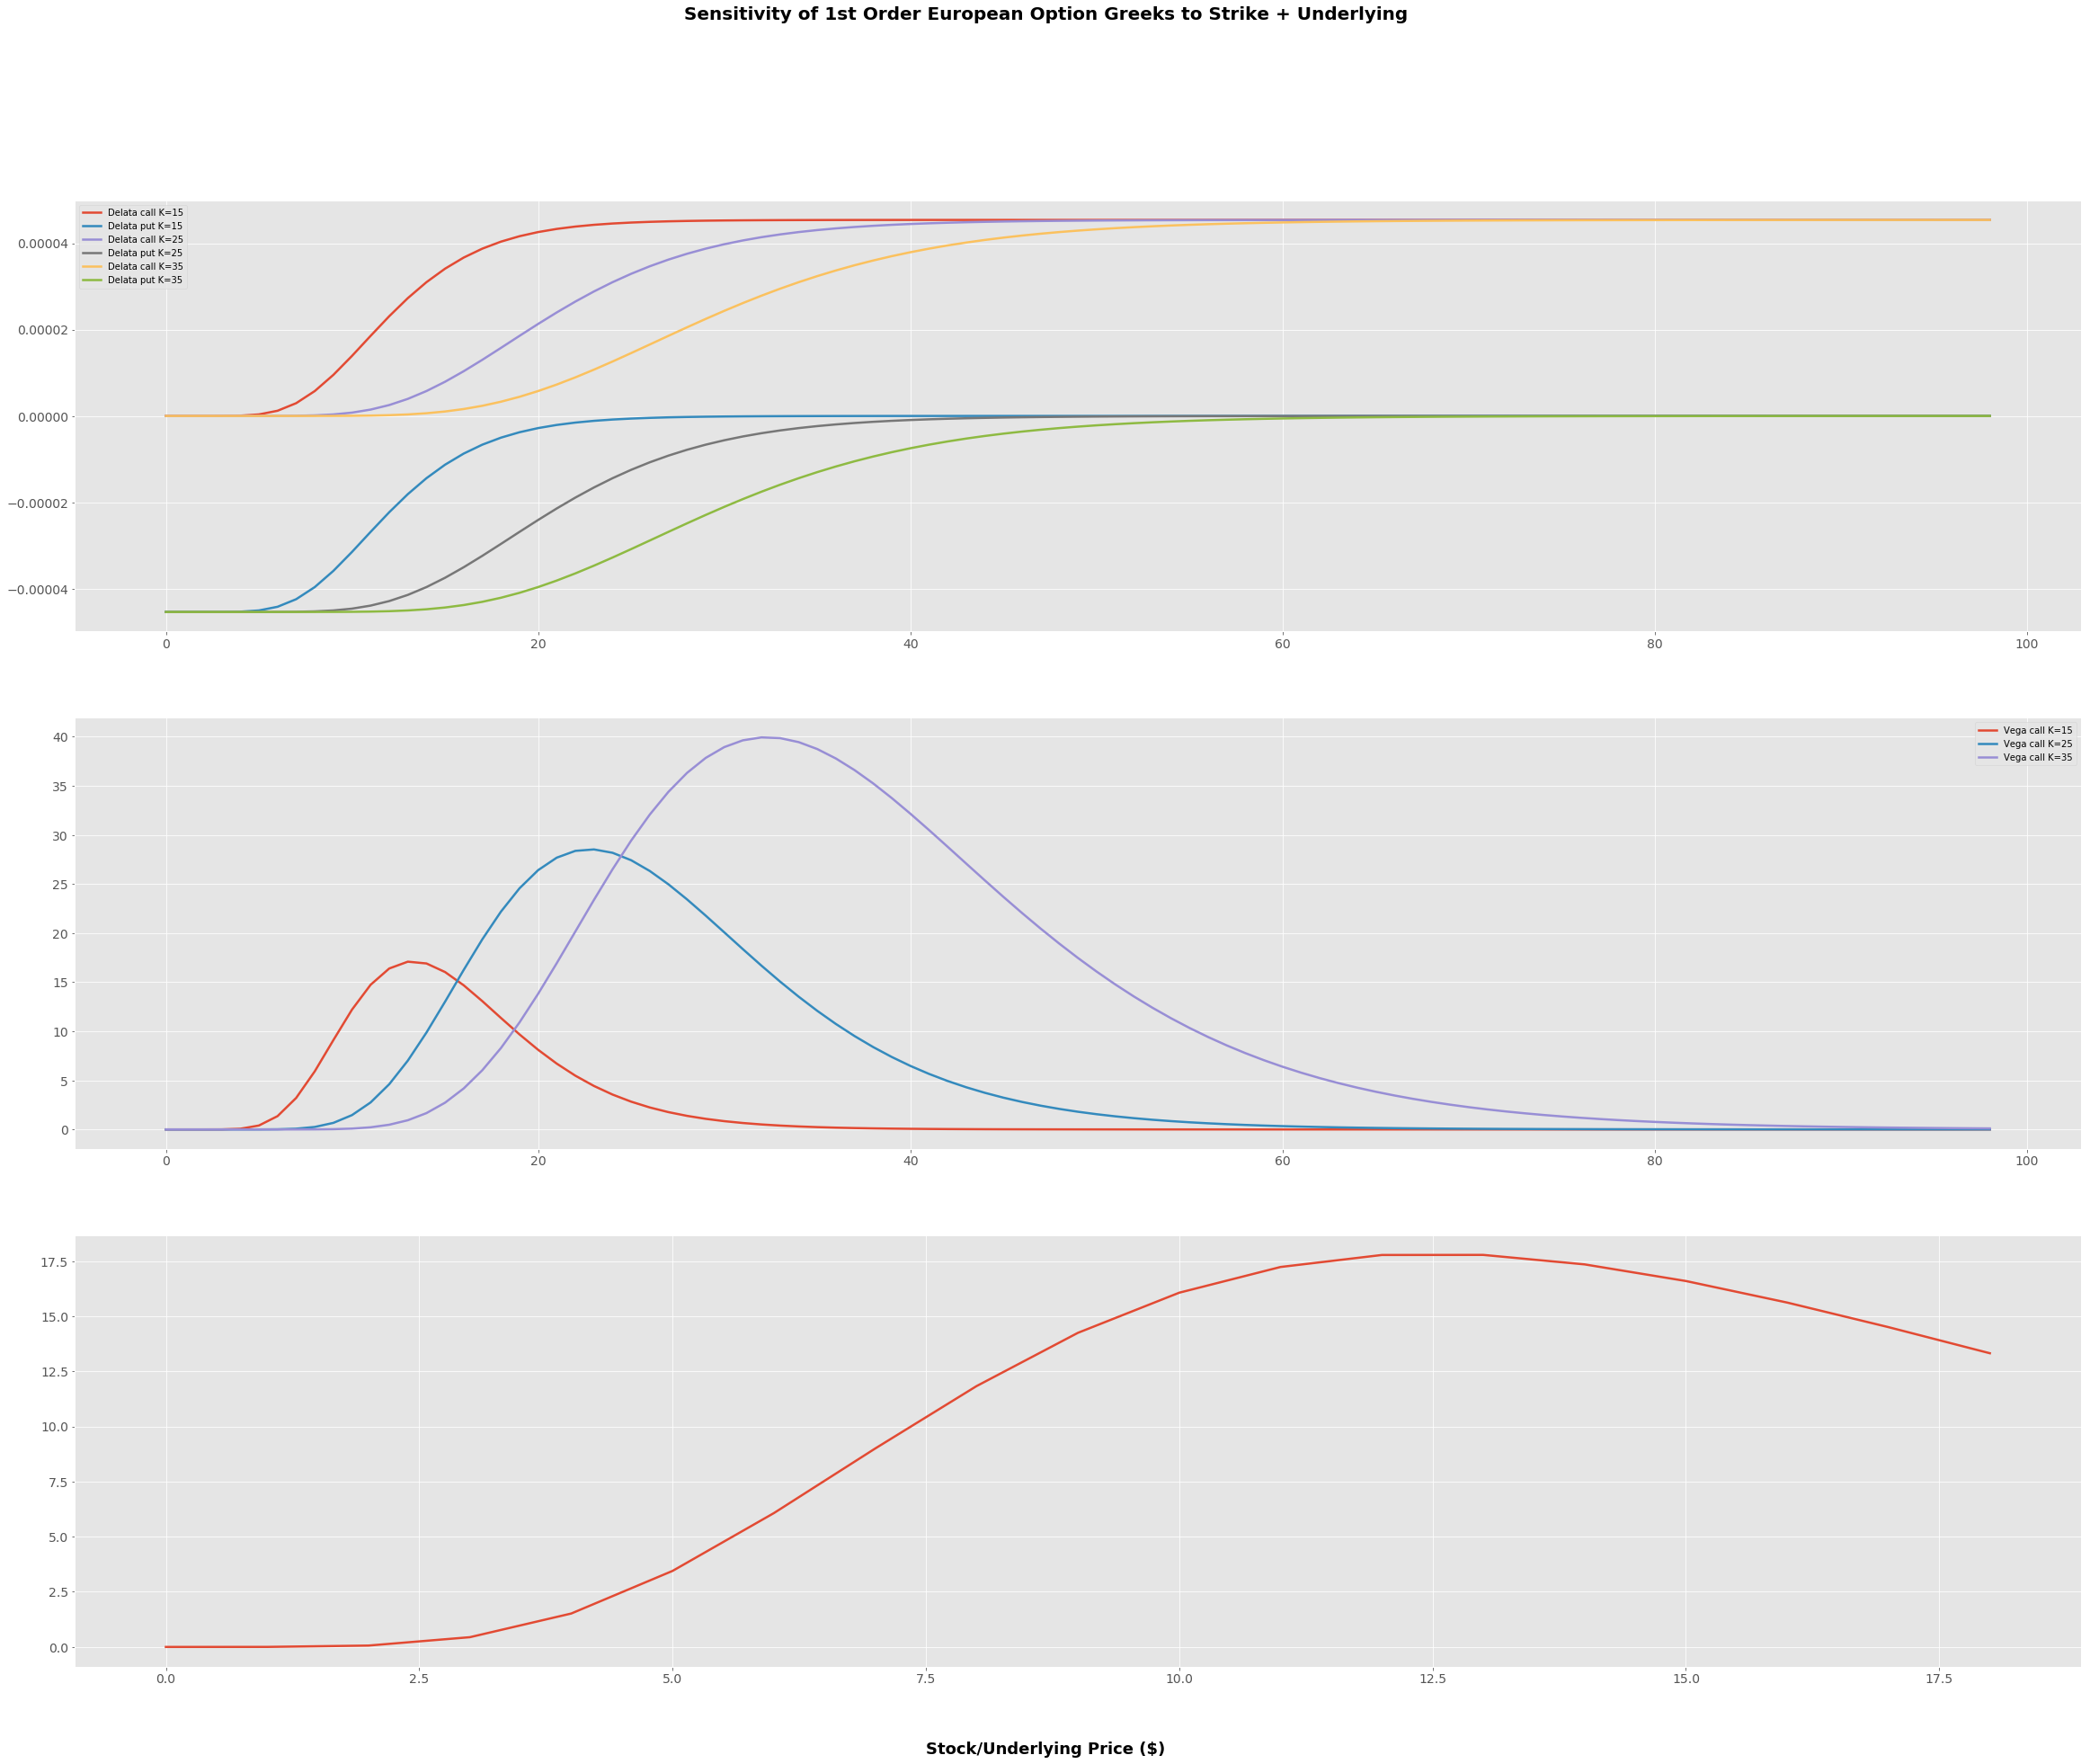

In [39]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(40, 30))
fig.suptitle('Sensitivity of 1st Order European Option Greeks to Strike + Underlying', fontsize=20, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18, fontweight='bold')
vals = [15,25,35]

r = 0.01
vol = 0.1
T = 10
t = 0


K = 10 

plt.subplot(311)
for i in vals:
    tmp_c = [delta(s, i, r, vol, T, t, 'call') for s in np.arange(1, 100)]
    tmp_p = [delta(s, i, r, vol, T, t, 'put') for s in np.arange(1, 100)]
    plt.plot(tmp_c, label=("Delata call K=%i" % i))
    plt.plot(tmp_p, label=("Delata put K=%i" % i))

plt.legend()
    
plt.subplot(312)    
for i in vals:
    tmp_c = [vega(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [vega(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label=("Vega call K=%i" % i))
#     plt.plot(tmp_p, label=("Vega put K=%i" % i))

plt.legend()

# vol smile
plt.subplot(313)
tmp_c = [vega(10, k, r, vol, 20, t, "call") for k in np.arange(1,20)]
plt.plot(tmp_c)

In [40]:
# IMPLIED VOLATILITY: Calculated using newton method

In [45]:
MAX_ITERATIONS = 100
PRECISION = 0.00001
def find_vol(target_value, S, K, T, r, t=0, call_put='call'):
    sigma = 0.5
    for i in range(0, MAX_ITERATIONS):
        if call_put == 'call':
            price = BS_call( S, K, r, sigma, T, t)
        elif call_put == 'put':
            price = BS_put( S, K, r, sigma, T, t)
        
        v = vega(S, K, r, vol, T, t, call_put)
        diff = target_value - price  # our root
        
#         print(i, sigma, diff) 
        
        if(abs(diff) < PRECISION):
            return sigma
        sigma = sigma + diff/v # f(x) / f'(x)
    
    return sigma

In [48]:
import datetime
V_market = 1.72
K = 205.0
T = (datetime.date(2019,5,3) - datetime.date(2019,3,26)).days / 365.
print(T)
S = 188.74
r = 0.0002
cp = 'call' # call option

find_vol(V_market, S, K, T, r) 

0.10410958904109589


-74.04771003053506

In [43]:
impl_vols = find_vol()

TypeError: find_vol() missing 5 required positional arguments: 'target_value', 'S', 'K', 'T', and 'r'